Problem 1. Use the same data as earlier. Build the best MLR model you can. Why do you think yours is best? Make sure you support your choice with plots, written explanation, etc. Include at least three variables, at least one of which should be a dummy variable.

In [78]:
## Problem 1.
## we have to evaluate price of the house in Sacramento
## street, city, zip, state, beds, baths, sq__ft, type, sale_date, price, latitude, longitude
## these are different variables. Some of them are in the same group. 
## street, city, zip, state,latitude, longitude are in group one
## beds is group 2.
## baths is group 3.
## sq__ft is group 4.
## typeis group 5. 
## sale_date is group 6.

#--------------------------------------#
#          import data
#--------------------------------------#

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

new_data = pd.read_csv('sacramento_real_estate_transactions.csv', sep=',')
new_data  = new_data.loc[new_data['sq__ft'] > 0]
new_data  = new_data.loc[new_data['beds'] > 0]
new_data  = new_data.loc[new_data['baths'] > 0]
new_data  = new_data.loc[new_data['price'] > 10000]
new_data  = new_data.loc[new_data['type'] != 'Unknown']
new_data.shape

#--------------------------------------#
#        Seprate data and target (price)
#--------------------------------------#

targets = pd.DataFrame(new_data['price'], columns=["price"])
df = new_data.drop('price', axis=1) 
df.head()
#--------------------------------------#
#        1) model one variable
#--------------------------------------#

import statsmodels.api as sm

X = df["sq__ft"]
y = targets["price"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#--------------------------------------#
#        2) model two variable
#--------------------------------------#

X = df[["sq__ft", "zip"]]
y = targets["price"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

#--------------------------------------#
#        3) create dummy variable
#--------------------------------------#
#raw_data = {'type': ['Condo', 'Multi-Family', 'Residential', 'Unknown']}

df1 = pd.DataFrame(new_data['type'], columns=["type"])
df_type = pd.get_dummies(df['type'],drop_first=True)
df_new = pd.concat([new_data, df_type], axis=1)
df_new

#--------------------------------------#
#        3) model with dummy variable
#--------------------------------------#
X = df_new[["sq__ft", "zip", "Multi-Family", "Residential"]]
y = targets["price"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     256.8
Date:                Mon, 28 Nov 2016   Prob (F-statistic):          2.95e-142
Time:                        23:27:35   Log-Likelihood:                -10313.
No. Observations:                 812   AIC:                         2.064e+04
Df Residuals:                     807   BIC:                         2.066e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const         2.033e+07   3.15e+06      6.448      0.000      1.41e+07  2.65e+07
sq__ft         131.9005      4.460     29.575      0.000       123.146   140.655
zip           -212.2435     32.916     -6.448      0.000      -276.854  -147.633
Multi-Family -4.628e+04   2.58e+04     -1.794      0.073     -9.69e+04  4346.792
Residential   1.754e+04   1.31e+04      1.342      0.180     -8109.780  4.32e+04
==============================================================================
Omnibus:                      328.459   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1825.087
Skew:                           1.758   Prob(JB):                         0.00
Kurtosis:                       9.448   Cond. No.                     1.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Problem 2. Plot the residuals comparing your MLR model to the true data points.


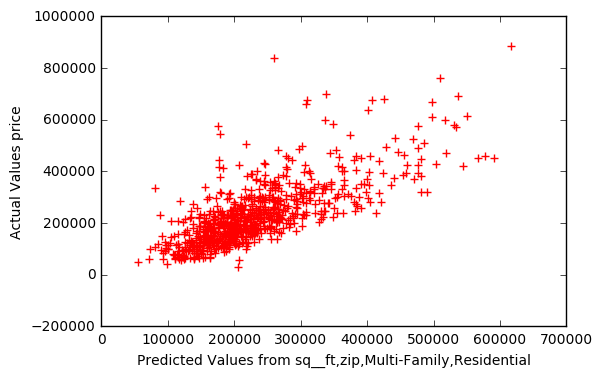

MSE: 1.62708489643e+12


In [70]:
## Problem 2. 
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq__ft,zip,Multi-Family,Residential")
plt.ylabel("Actual Values price")
plt.show()
print "MSE:", model.mse_model


Problem 3. List the five assumptions for an MLR model. Indicate which ones are the same as the assumptions for an SLR model. 


In [ ]:
## Problem 3.
#Linearity: Y must have an approximately linear relationship with each independent X_i.
#Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.
#Normality: The errors (residuals) follow a Normal distribution.
#Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)
#Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j.


## all of them except the last one are the same as the assumptions for an SLR

Problem 4. Pick at least two assumptions and articulate whether or not you believe them to be met and why.


In [ ]:
## Problem 4.
#linearity- all the coefficient are linear.

#independence - type of the house are independent from the zip code and square feet


Problem 5. Interpret the y-intercept and at least two of the independent variables.

In [ ]:
## Problem 5.

Y-interception is 2.033e+07
if all the independent variables are zero(sq__ft,zip, residuals,Multi-Family) the price is Y-interception. It is high and does not make sendnse




Problem 6. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. Write a few sentences interpreting some of the output.

(Hint: scikit-learn does not have this functionality built in, but statsmodels does.)

In [80]:
## Problem 6.
#showed above



BONUS. You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.

In [ ]:
## BONUS.